# Bengali News Classification Using Naive Bayes, SVM,XGB






In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
train = pd.read_csv('/content/train.csv') #reading train csv file
train.head()

,title,article,label
0,এই অভিনেতার ‘প্রস্তাব’ মানলে ভারতীয় সিনেমার খো...,স্রেফ দু’টি টুইটেই সোশ্যাল মিডিয়ায় তোলপাড় ফে...,entertainment
1,"সচিন সাংসদ হয়েছেন, তাই চিন্তা কম জেটলির। কেন?",একবার রেল বাজেট। একবার সাধারণ বাজেট। খবরের শি...,national
2,ক্রিকেটার থেকে গাইড! জাতীয় দলের ক্রিকেটারের অব...,কিছুদিন আগেই রাজ্যের গাইড বনে গিয়েছিলেন চেতেশ...,sports
3,"দুষ্কৃতীদের নজরে এটিএম, হাল হকিকত্ ঘুরে দেখলেন...",কলকাতায় দুষ্কৃতীদের নজরে এখন বিভিন্ন ব্যাঙ্কের...,kolkata
4,"সৌজন্যের বালাই নেই, দিনভর আকচা আকচি কং-বিজেপি’র",সারা দিন আকচা আকচিতেই কাটিয়ে দিল দেশের দুই বৃহ...,national


In [ ]:
train.describe() # checking description of the data

,title,article,label
count,5164,5163,5163
unique,5121,5125,10
top,র বি - বি শে ষ,রবিবার ওলা ক্যাবে নাবালিকার গণধর্ষণের ঘটনা প্...,kolkata
freq,4,2,2094


In [ ]:
test = pd.read_csv('/content/valid.csv') #validation data read
test.head()

,title,article,label
0,মাঠে নেমেই অর্ধশতক! রাহুল জানালেন তাঁর সাফল্যে...,গলেরই পুনরাবৃত্তি হয়তো কলম্বোয় ঘটতে চলেছে। শ্...,sports
1,কুমার সম্ভব?,তাহলে কি ঘাটা-আঘাটায় পুলিশের মারধর খেয়ে নীরবে...,state
2,স্বামী-স্ত্রীর ঘনিষ্ঠ মুহূর্তের ছবি সোশ্যাল মি...,পণের দাবিতে নজিরবিহীন ব্ল্যাকমেল স্ত্রীকে। স্ব...,kolkata
3,‘এবেলা’ খবরের প্রতিক্রিয়া: অভীকের সঙ্গে কথা হল...,বাংলার প্যারালিম্পিক সংস্থার সঙ্গে যোগাযোগ হল...,sports
4,‘অ্যায় দিল হ্যায় মুশকিল’-এই অভিনেত্রী কি অন্তঃ...,"‘বোল্ড’, তথাকথিত পারিবারিক ছবির গণ্ডী থেকে বে...",entertainment


In [ ]:

#checking null values
df = pd.read_csv('/content/train.csv')


null_values = df.isnull().sum()
print(null_values)

title      0
article    1
label      1
dtype: int64


In [ ]:
# fix random seed for reproducibility
np.random.seed(7) #reproduce korbe, reuse kora jabe
train = train.drop_duplicates().reset_index(drop=True) #Duplicate drop
test = test.drop_duplicates().reset_index(drop=True)

In [ ]:
test = pd.read_csv('/content/valid.csv')
test.head()

,title,article,label
0,মাঠে নেমেই অর্ধশতক! রাহুল জানালেন তাঁর সাফল্যে...,গলেরই পুনরাবৃত্তি হয়তো কলম্বোয় ঘটতে চলেছে। শ্...,sports
1,কুমার সম্ভব?,তাহলে কি ঘাটা-আঘাটায় পুলিশের মারধর খেয়ে নীরবে...,state
2,স্বামী-স্ত্রীর ঘনিষ্ঠ মুহূর্তের ছবি সোশ্যাল মি...,পণের দাবিতে নজিরবিহীন ব্ল্যাকমেল স্ত্রীকে। স্ব...,kolkata
3,‘এবেলা’ খবরের প্রতিক্রিয়া: অভীকের সঙ্গে কথা হল...,বাংলার প্যারালিম্পিক সংস্থার সঙ্গে যোগাযোগ হল...,sports
4,‘অ্যায় দিল হ্যায় মুশকিল’-এই অভিনেত্রী কি অন্তঃ...,"‘বোল্ড’, তথাকথিত পারিবারিক ছবির গণ্ডী থেকে বে...",entertainment


In [ ]:
train.label.unique() #checking unique values #exmple clmn

array(['entertainment', 'national', 'sports', 'kolkata', 'state',
       'international', 'sport', 'nation', 'world', 'travel', nan],
      dtype=object)

In [ ]:
#train data
#replacing through numbers
#part of data cleaning
#same variables=same nmbr replace

train.label = train.label.replace('entertainment', 1)
train.label = train.label.replace('national', 2)
train.label = train.label.replace('sports', 3)
train.label = train.label.replace('kolkata', 4)
train.label = train.label.replace('state', 5)
train.label = train.label.replace('international', 6)
train.label = train.label.replace('sport', 3)
train.label = train.label.replace('nation', 2)
train.label = train.label.replace('world', 6)
train.label = train.label.replace('travel', 7)


In [ ]:
# train.label.head()

In [ ]:
test.label.unique() #checking test unique values

array(['sports', 'state', 'kolkata', 'entertainment', 'international',
       'national', 'world', 'nation', 'sport'], dtype=object)

In [ ]:
#replacing test variables through numbers

test.label = test.label.replace('entertainment', 1)
test.label = test.label.replace('national', 2)
test.label = test.label.replace('sports', 3)
test.label = test.label.replace('kolkata', 4)
test.label = test.label.replace('state', 5)
test.label = test.label.replace('international', 6)
test.label = test.label.replace('sport', 3)
test.label = test.label.replace('nation', 2)
test.label = test.label.replace('world', 7)
test.label = test.label.replace('travel', 8)


In [ ]:
#train.label.head()

In [ ]:
df = pd.concat([train, test], ignore_index=True)

# Drop rows with missing values
a = df.isnull().sum()
# Display the first few rows of the new dataset
print(a)

title      0
article    1
label      1
dtype: int64


**Naive Bayes**




In [ ]:
#machine learning model
#using for classification

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #Tf vectorising the words, converting everything into vector
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load the dataset
train = df

# Drop rows with missing values in the 'article' column
train = train.dropna(subset=['article'])

# Preprocessing
X = train['article']
y = train['label']

MAX_NB_WORDS = 5000

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=MAX_NB_WORDS)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluating the model
accuracyNB = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracyNB}")

Accuracy: 0.5251256281407035


In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.35      0.50       181
         2.0       0.83      0.05      0.10       198
         3.0       0.97      0.57      0.72       182
         4.0       0.47      0.99      0.64       653
         5.0       0.43      0.03      0.06       311
         6.0       0.00      0.00      0.00        67

    accuracy                           0.53      1592
   macro avg       0.59      0.33      0.34      1592
weighted avg       0.59      0.53      0.42      1592



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy3=accuracyNB
print("Accuracy os Naive Bayes",accuracy3)

Accuracy os Naive Bayes 0.5251256281407035


Confusion Matrix:
[[ 64   0   1 116   0   0]
 [  2  10   1 181   4   0]
 [  8   0 104  70   0   0]
 [  0   0   1 648   4   0]
 [  0   1   0 300  10   0]
 [  1   1   0  60   5   0]]


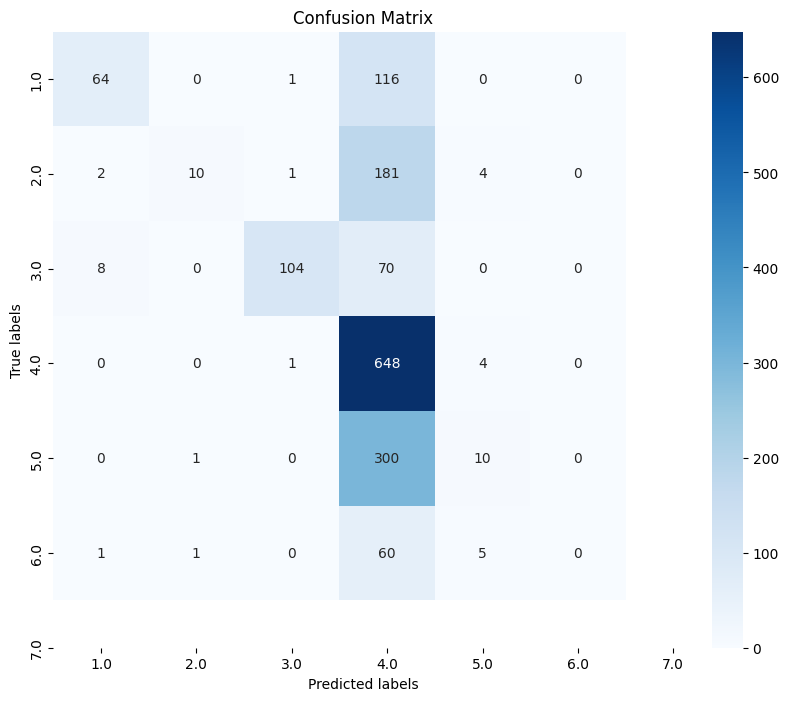

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **SVM_Classifier**

****SVM Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
train = df

train = train.dropna(subset=['article'])

# Preprocessing
X = train['article']
y = train['label']

# TF-IDF Vectorization
MAX_NB_WORDS = 50000
tfidf_vectorizer = TfidfVectorizer(max_features=MAX_NB_WORDS)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# SVM Classifier
svm_classifier = SVC(kernel='linear')  # You can adjust the kernel as needed
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
accuracySVM = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracySVM}")

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.7989949748743719
              precision    recall  f1-score   support

         1.0       0.84      0.90      0.86       181
         2.0       0.68      0.63      0.65       198
         3.0       0.91      0.84      0.87       182
         4.0       0.83      0.91      0.87       653
         5.0       0.73      0.69      0.71       311
         6.0       0.58      0.33      0.42        67

    accuracy                           0.80      1592
   macro avg       0.76      0.72      0.73      1592
weighted avg       0.79      0.80      0.79      1592



In [ ]:
accuracy4=accuracySVM
print("SVM Accuracy",accuracySVM)

SVM Accuracy 0.7989949748743719


Confusion Matrix:
[[162   2   6   7   2   2]
 [  9 124   1  26  29   9]
 [ 11   5 153   7   4   2]
 [  3  10   4 596  40   0]
 [  3  19   3  68 215   3]
 [  6  22   2  12   3  22]]


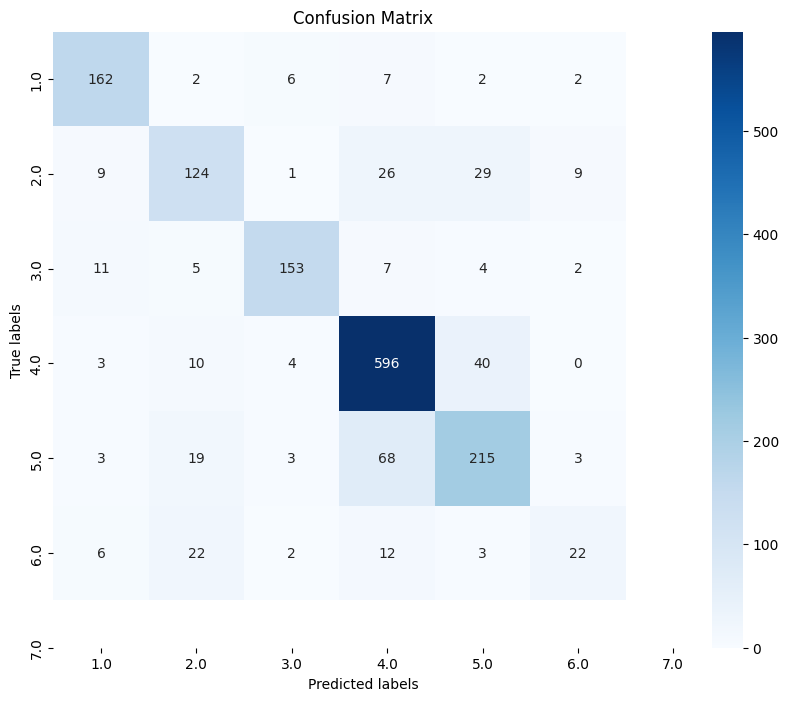

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()





##XGBClassifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
train = df

train = train.dropna(subset=['article'])

# Preprocessing
X = train['article']
y = train['label']

# Ensure labels start from 0
y = y - 1

# TF-IDF Vectorization
MAX_NB_WORDS = 50000
tfidf_vectorizer = TfidfVectorizer(max_features=MAX_NB_WORDS)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# XGBoost Classifier
xgb_classifier = XGBClassifier()  # You can further tune hyperparameters here
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracyXGB = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracyXGB}")

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.8059045226130653
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79       181
         1.0       0.64      0.62      0.63       198
         2.0       0.91      0.87      0.89       182
         3.0       0.84      0.95      0.89       653
         4.0       0.76      0.74      0.75       311
         5.0       0.69      0.27      0.39        67

    accuracy                           0.81      1592
   macro avg       0.78      0.70      0.72      1592
weighted avg       0.80      0.81      0.80      1592



[[135  10   4  19  10   3]
 [ 10 123   0  34  29   2]
 [  6   5 158   8   2   3]
 [  1   7   2 620  23   0]
 [  3  21   7  51 229   0]
 [  4  25   2  10   8  18]]


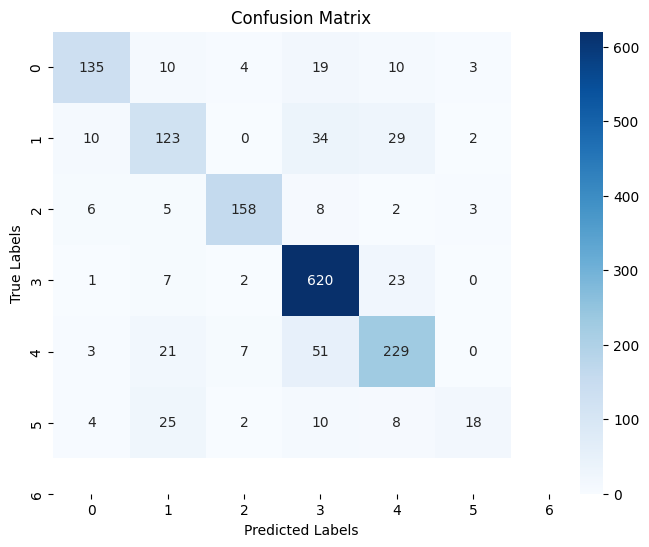

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb_classifier.classes_,
            yticklabels=xgb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Comparison of accuracy****

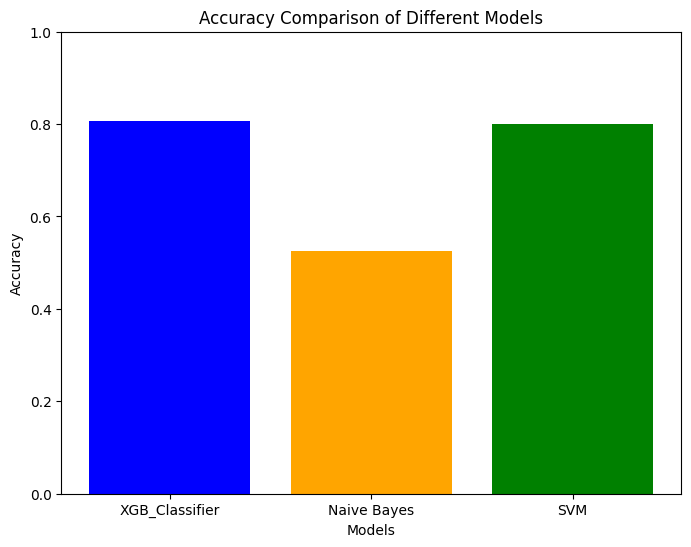

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for CNN, SVM, and Naive Bayes models


# Accuracy scores
accuracies = [ accuracyXGB, accuracyNB, accuracySVM]
models = [ 'XGB_Classifier', 'Naive Bayes', 'SVM']


plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting the y-axis limit from 0 to 1 for accuracy range
plt.show()
